In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 


In [3]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [4]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

280

In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a293a63a97dc00a97973ba034d28ed77


In [10]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [11]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Buenaventura"
city_weather = requests.get(city_url)
city_weather
# Get the JSON text of the 'Get' request.
city_weather.json()

{'coord': {'lon': -77.07, 'lat': 3.89},
 'weather': [{'id': 501,
   'main': 'Rain',
   'description': 'moderate rain',
   'icon': '10d'}],
 'base': 'model',
 'main': {'temp': 78.69,
  'pressure': 1009,
  'humidity': 93,
  'temp_min': 78.69,
  'temp_max': 78.69,
  'sea_level': 1009,
  'grnd_level': 1003},
 'wind': {'speed': 4.56, 'deg': 226},
 'rain': {'3h': 6.38},
 'clouds': {'all': 100},
 'dt': 1573417184,
 'sys': {'country': 'CO', 'sunrise': 1573383213, 'sunset': 1573426255},
 'timezone': -18000,
 'id': 3688451,
 'name': 'Buenaventura',
 'cod': 200}

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
#weather_response_df = pd.DataFrame(weather_response)
#weather_response_df.head(10)

In [13]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
counter = 0
# Loop through all the cities in the list.
for city in cities:

    # Group cities in sets of 50 for logging purposes.
    #if it is raining, get the amount of rainfall in inches 
    #for the last three hours. If it is not raining, add 0 inches for the city
    counter += 1
    if (counter % 50 == 0):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    rain_3h=0
    snow_3h=0
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        #city_description=city_weather["weather"]["description"]
        #snow_3h=city_weather["snow"]["3h"]
        #rain_3h=city_weather["rain"]["3h"]
        # Convert the date to ISO standard.
        #city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        #print(city_weather["weather"][0]["main"])
        #weather_main=city_weather["weather"]["main"]
       
        try:
            if city_weather["weather"][0]["main"] == "Rain":
                rain_3h=city_weather["rain"]["3h"]     
                #city_data.append({"Rain inches last 3 hrs":rain_3h})   
                #print("tttttttttttttttttttttttttttttttttt")
                #print(rain_3h)


                #city_data.append({"Rain inches last 3 hrs":rain_3h})   
            #Append the city information into city_data list.
        except:
            rain_3h=0   
            #city_data.append({"Rain inches last 3 hrs":rain_3h})
            
            
    
        try:
            if city_weather["weather"][0]["main"] == "Snow":
                snow_3h=city_weather["snow"]["3h"]     
                #city_data.append({"Rain inches last 3 hrs":rain_3h})   
                #print(snow_3h)
        except:
            snow_3h=0   
            #city_data.append({"Rain inches last 3 hrs":rain_3h})
            
   
            
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          #"Date": city_date,
                          #"Current description": city_description,
                          "Rain inches (last 3 hrs)":rain_3h,
                          "Snow inches (last 3 hrs)":snow_3h
                          }) 

#rain_list = []
#if ... :
 #try rain_list.append(json_object['Rain']['3h']   
                      #except: rain_list.append(json_object['Rain']['1h']
                          
# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
len(city_data)

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lorengau
Processing Record 2 of Set 1 | mount isa
Processing Record 3 of Set 1 | suntar
Processing Record 4 of Set 1 | castro
Processing Record 5 of Set 1 | novoagansk
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | provideniya
Processing Record 8 of Set 1 | chokurdakh
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | pisco
Processing Record 11 of Set 1 | upernavik
Processing Record 12 of Set 1 | oranjestad
Processing Record 13 of Set 1 | cape town
Processing Record 14 of Set 1 | hermanus
Processing Record 15 of Set 1 | mataura
Processing Record 16 of Set 1 | saint george
Processing Record 17 of Set 1 | pangai
Processing Record 18 of Set 1 | halifax
Processing Record 19 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 20 of Set 1 | jamestown
Processing Record 21 of Set 1 | mahebourg
Processing Record 22 of Set 1 | saint-philippe
Proc

Processing Record 36 of Set 4 | damietta
Processing Record 37 of Set 4 | longyearbyen
Processing Record 38 of Set 4 | barra patuca
Processing Record 39 of Set 4 | quatre cocos
Processing Record 40 of Set 4 | seoul
Processing Record 41 of Set 4 | totness
Processing Record 42 of Set 4 | tooele
Processing Record 43 of Set 4 | sao felix do xingu
Processing Record 44 of Set 4 | kokopo
Processing Record 45 of Set 4 | dire
Processing Record 46 of Set 4 | candido mendes
Processing Record 47 of Set 4 | antofagasta
Processing Record 48 of Set 4 | westpunt
City not found. Skipping...
Processing Record 49 of Set 4 | leh
Processing Record 50 of Set 4 | osypenko
Processing Record 1 of Set 5 | elizabethton
Processing Record 2 of Set 5 | anloga
Processing Record 3 of Set 5 | chancay
Processing Record 4 of Set 5 | senno
Processing Record 5 of Set 5 | aksarka
Processing Record 6 of Set 5 | belmonte
Processing Record 7 of Set 5 | san pedro
Processing Record 8 of Set 5 | ketchikan
Processing Record 9 of S

253

In [14]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(50)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Rain inches (last 3 hrs),Snow inches (last 3 hrs)
0,Lorengau,-2.02,147.27,83.53,73,63,9.04,PG,0.00,0.00
1,Mount Isa,-20.73,139.49,59.00,18,79,9.71,AU,0.00,0.00
2,Suntar,62.16,117.65,-7.69,94,68,5.57,RU,0.00,0.00
3,Castro,-42.48,-73.76,64.40,59,99,6.93,CL,0.00,0.00
4,Novoagansk,61.94,76.66,-13.67,89,0,2.39,RU,0.00,0.00
5,Rikitea,-23.12,-134.97,73.87,83,100,14.00,PF,0.00,0.00
6,Provideniya,64.42,-173.23,35.60,98,90,17.90,RU,0.00,0.00
7,Chokurdakh,70.62,147.90,3.69,95,99,9.75,RU,0.00,0.00
8,Albany,42.65,-73.75,46.99,42,75,6.93,US,0.00,0.00
9,Pisco,-13.71,-76.20,71.60,30,75,10.29,PE,0.00,0.00


In [20]:
new_column_order = ["City", "Country", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed","Rain inches (last 3 hrs)","Snow inches (last 3 hrs)"]

In [25]:
city_data_df= city_data_df[new_column_order] 
city_data_df.head(60)

,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Rain inches (last 3 hrs),Snow inches (last 3 hrs)
0,Lorengau,PG,-2.02,147.27,83.53,73,63,9.04,0.00,0.00
1,Mount Isa,AU,-20.73,139.49,59.00,18,79,9.71,0.00,0.00
2,Suntar,RU,62.16,117.65,-7.69,94,68,5.57,0.00,0.00
3,Castro,CL,-42.48,-73.76,64.40,59,99,6.93,0.00,0.00
4,Novoagansk,RU,61.94,76.66,-13.67,89,0,2.39,0.00,0.00
5,Rikitea,PF,-23.12,-134.97,73.87,83,100,14.00,0.00,0.00
6,Provideniya,RU,64.42,-173.23,35.60,98,90,17.90,0.00,0.00
7,Chokurdakh,RU,70.62,147.90,3.69,95,99,9.75,0.00,0.00
8,Albany,US,42.65,-73.75,46.99,42,75,6.93,0.00,0.00
9,Pisco,PE,-13.71,-76.20,71.60,30,75,10.29,0.00,0.00


In [37]:
# Create the output file (CSV).
output_data_file = "weather_data/WeatherPy_challenge.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [27]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [28]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'11/10/19'

In [ ]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

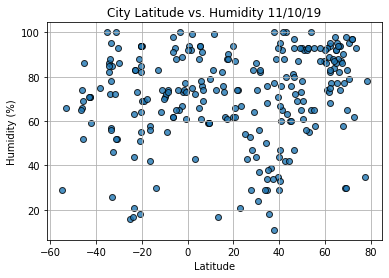

In [29]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

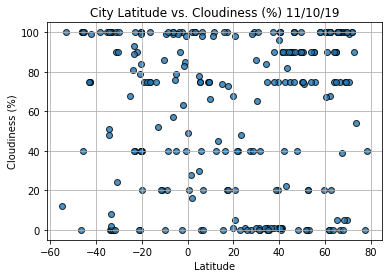

In [30]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

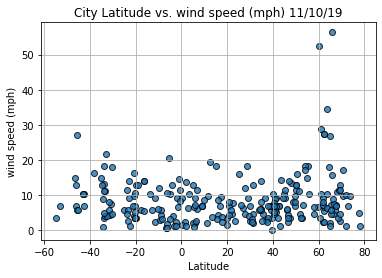

In [31]:
#Now, we can create our last scatter plot! Let’s repurpose 
#the code we have been using and change the y-axis variable to “wind speed,” 
#the title to “Wind Speed,” and the y-axis label to “Wind Speed (mph).”

# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. wind speed (mph) "+ time.strftime("%x"))
plt.ylabel("wind speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [32]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(f"regression ")
    
    plt.show()


In [33]:
index13=city_data_df.loc[13]
index13

City                        Hermanus
Country                           ZA
Lat                           -34.42
Lng                            19.24
Max Temp                       66.99
Humidity                          86
Cloudiness                        48
Wind Speed                      8.99
Rain inches (last 3 hrs)           0
Snow inches (last 3 hrs)           0
Name: 13, dtype: object

In [34]:
city_data_df["Lat"] >= 0

0      False
1      False
2       True
3      False
4       True
       ...  
248     True
249    False
250     True
251     True
252     True
Name: Lat, Length: 253, dtype: bool

In [35]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Rain inches (last 3 hrs),Snow inches (last 3 hrs)
2,Suntar,RU,62.16,117.65,-7.69,94,68,5.57,0.0,0.0
4,Novoagansk,RU,61.94,76.66,-13.67,89,0,2.39,0.0,0.0
6,Provideniya,RU,64.42,-173.23,35.60,98,90,17.90,0.0,0.0
7,Chokurdakh,RU,70.62,147.90,3.69,95,99,9.75,0.0,0.0
8,Albany,US,42.65,-73.75,46.99,42,75,6.93,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
247,Kapit,MY,2.02,112.94,71.38,99,16,1.32,0.0,0.0
248,Guerrero Negro,MX,27.97,-114.04,76.05,47,99,11.92,0.0,0.0
250,Nemuro,JP,43.32,145.57,42.31,63,82,14.25,0.0,0.0
251,Ballina,IE,54.11,-9.15,46.99,100,90,17.22,0.0,0.0


In [36]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]